## Social Media Strategy for a Marketing Campaign 📊

You’ve just joined BuzzLab as a Data Scientist. Your boss needs fast, actionable insights for an upcoming product launch campaign. The goal? Make it go viral — no guesswork, just data.

You’re given a dataset of 5,000 viral social media posts across TikTok, Instagram, Twitter, and YouTube. Your job is to uncover what drives engagement so the creative team knows exactly where to focus.

Your boss asked you to:

- Identify the best-performing platforms 
- Spot high-impact hashtags (#challenge, #dance…)
- Compare content types (video, reel, tweet…) 
- Analyze how engagement varies by region 
- Highlight one unexpected insight that gives BuzzLab an edge 


Now, Let’s get to work!

### Step 1: Load the Dataset 📂

First, we need to load the dataset to explore its structure and identify key variables for our analysis.

In [3]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


So our dataset contains information about social media posts across platforms, detailing Post ID, Platform, Hashtag, Content Type, Region, Views, Likes, Shares, Comments, and Engagement Level.

### Step 2: Explore the Dataset 🔍

Let's examine the dataset's dimensions, data types, and basic statistics to identify any data quality issues and understand the overall data distribution.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


The dataset is a DataFrame with 5000 entries and 10 columns, all containing non-null values. It includes identifiers, categorical data, and numerical data, providing a comprehensive view for analyzing social media engagement metrics.

In [5]:
data.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


The dataset contains 5,000 entries with statistics for Views, Likes, Shares, and Comments. The average number of Views is approximately 2.49 million, with Likes, Shares, and Comments averaging around 251,475, 50,520, and 24,888 respectively. The data exhibits a wide range of values, as indicated by the standard deviations and the spread between the minimum and maximum values.

### Step 3: Which Platform Rewards Creativity the Most? 🎨

We'll analyze the distribution of total engagement across platforms using a box plot to identify outliers and high-performing platforms.

In [7]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


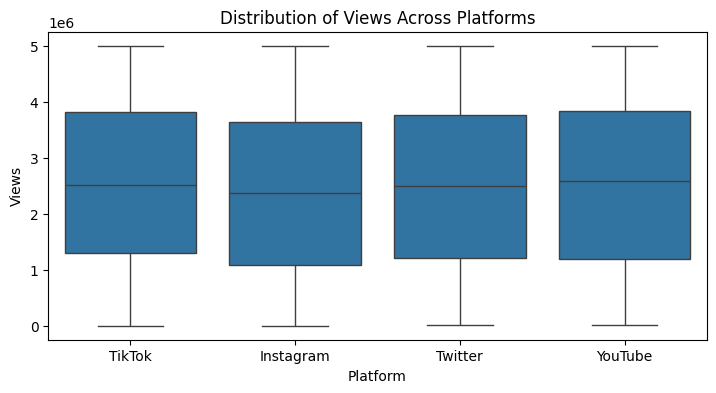

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8.5, 4))
sns.boxplot(x='Platform', y='Views', data=data)
plt.title('Distribution of Views Across Platforms')
plt.show()

The boxplot shows that the distribution of views is similar across TikTok, Instagram, Twitter, and YouTube, with medians around 2.5 million views. All platforms exhibit a similar range and spread of views, indicating no significant outliers or differences in viewership among them.

### Step 4: What is the Secret Sauce of Virality? 🔥

We'll create a stacked bar chart comparing engagement levels (High, Medium, Low) across different hashtags and platforms to identify patterns of virality.

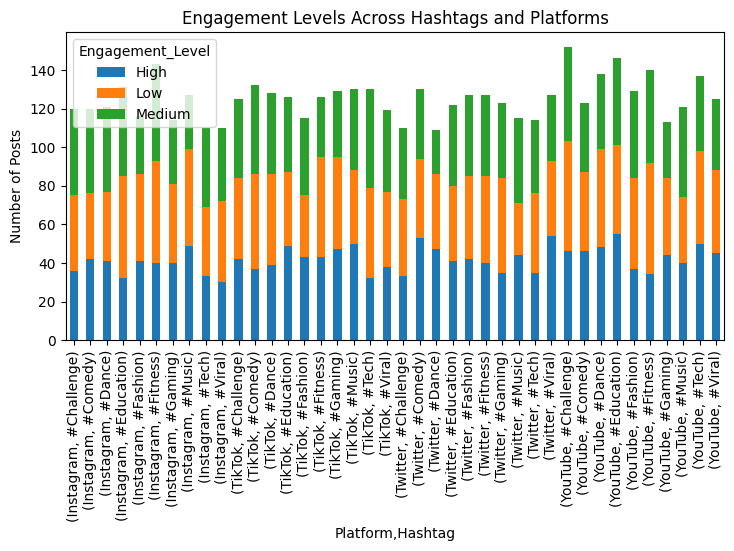

In [9]:
engagement_counts = data.groupby(['Platform', 'Hashtag', 'Engagement_Level']).size().unstack().fillna(0)

engagement_counts.plot(kind='bar', stacked=True, figsize=(8.5, 4))
plt.title('Engagement Levels Across Hashtags and Platforms')
plt.ylabel('Number of Posts')
plt.show()

The chart shows the distribution of engagement levels across hashtags and platforms. TikTok and Twitter hashtags generally exhibit higher medium engagement, whereas YouTube hashtags show more variation in high engagement levels. Instagram hashtags have a prominent share of high engagement posts, especially in hashtags like #challenge and #fashion.

### Step 5: Are Longer Videos Better, or Do People Prefer Quick Content? ⏱️

We'll create a grouped bar chart to compare engagement metrics (likes, shares, comments) across different content types.

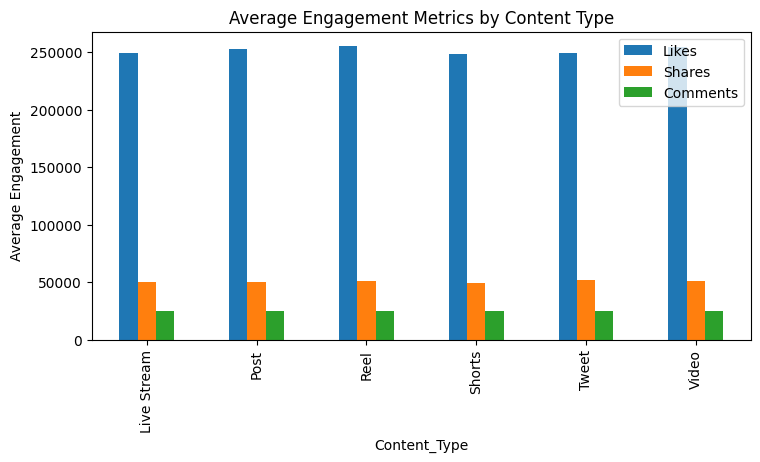

In [10]:
content_engagement = data.groupby('Content_Type')[['Likes', 'Shares', 'Comments']].mean()

content_engagement.plot(kind='bar', figsize=(8.5, 4))
plt.title('Average Engagement Metrics by Content Type')
plt.ylabel('Average Engagement')
plt.show()

The bar chart shows that all content types—Live Stream, Post, Reel, Shorts, Tweet, and Video—receive a high average number of likes, significantly outpacing shares and comments. Each content type exhibits a similar pattern of engagement, with likes being the most prevalent metric.

### Step 6: Is Engagement Regional? 🌍

We'll explore whether a hashtag trends differently in different countries using a heatmap to visualize the correlation between engagement levels and region-specific hashtags.

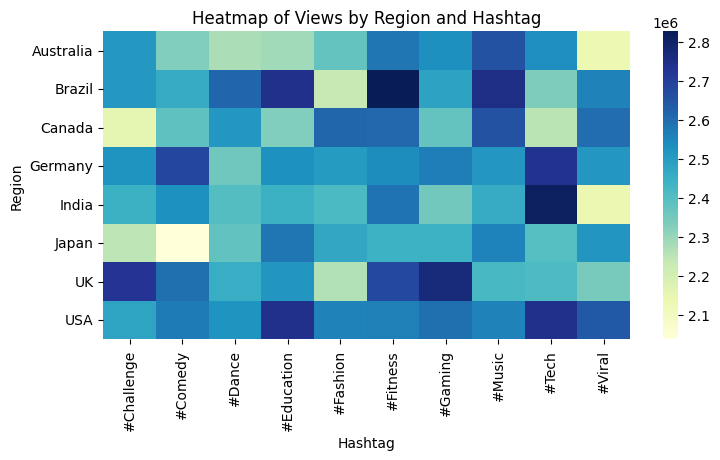

In [11]:
region_engagement = data.pivot_table(index='Region', columns='Hashtag', values='Views', aggfunc='mean').fillna(0)

plt.figure(figsize=(8.5, 4))
sns.heatmap(region_engagement, cmap='YlGnBu')
plt.title('Heatmap of Views by Region and Hashtag')
plt.show()

The heatmap shows that #Tech consistently receives high average views across regions, especially in India, Germany, and USA. We can see that #Comedy underperforms in Japan, and #Fitness shows strong engagement in Brazil.
Notably, #Challenge and #Viral display varied performance by region, suggesting they may be trend-sensitive or culturally specific.